In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [152]:
df_global = pd.read_csv('owid-covid-data.csv',usecols=['location','date','total_cases','total_deaths','total_tests','positive_rate','people_fully_vaccinated','population']);
#df_global = pd.read_csv('owid-covid-data.csv');

# country_name = 'United Kingdom';
# country_name = 'Sri Lanka';
country_name = 'India'
df_country = df_global[df_global['location'] == country_name].reset_index();
#df_country.reset_index(inplace=True);

#Fix NaNs produced from empty lines
for col in ['total_cases','total_deaths','total_tests','positive_rate','people_fully_vaccinated']:
    if (np.isnan(df_country[col][0])):
        df_country.loc[0,col] = 0;
    df_country[col].fillna(method='ffill', inplace=True);

#Uncomment block below to remove data before a given start date
# start_index = df_country.index[df_country['date'] == '2020-10-01']
# print('Start index:', start_index[0])
# df_country = df_country.loc[start_index[0]::]
# df_country.reset_index(drop=True, inplace=True);

#Uncomment block below to remove data after a given end date
end_index = df_country.index[df_country['date'] == '2022-02-28']
print('End index:', end_index[0])
df_country = df_country.loc[0:end_index[0]]
df_country.reset_index(drop=True, inplace=True);

df_country['total_recovered'] = 0;

for col in ['total_cases','total_deaths','total_tests','people_fully_vaccinated','population']:
    df_country[col] = pd.to_numeric(df_country[col], downcast="integer");


print(df_country)

End index: 760
     index location        date  total_cases  total_deaths  total_tests  \
0    70350    India  2020-01-30            1             0            0   
1    70351    India  2020-01-31            1             0            0   
2    70352    India  2020-02-01            1             0            0   
3    70353    India  2020-02-02            2             0            0   
4    70354    India  2020-02-03            3             0            0   
..     ...      ...         ...          ...           ...          ...   
756  71106    India  2022-02-24     42894345        513226    763569165   
757  71107    India  2022-02-25     42905844        513481    763569165   
758  71108    India  2022-02-26     42916117        513724    765735314   
759  71109    India  2022-02-27     42924130        513843    766757518   
760  71110    India  2022-02-28     42931045        514023    767481346   

     positive_rate  people_fully_vaccinated  population  total_recovered  
0        

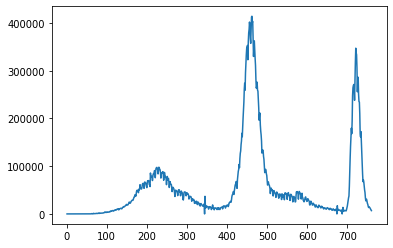

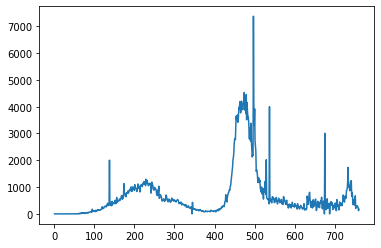

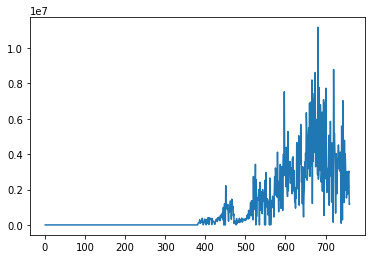

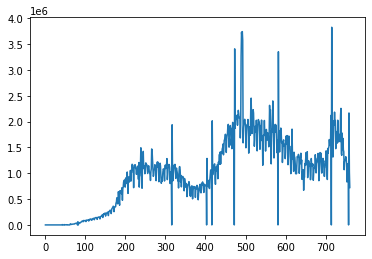

1393409033

In [156]:
plt.plot(df_country['total_cases'].diff())
plt.show()

plt.plot(df_country['total_deaths'].diff())
plt.show()

plt.plot(df_country['people_fully_vaccinated'].diff())
plt.show()

plt.plot(df_country['total_tests'].diff())
plt.show()

df_country['population'][0]

In [154]:
popN = df_country['population'][0];
country_str = country_name.lower().replace(" ", "");
f = open("csv_data/" + country_str + ".txt", "w")
f.write(str(popN) + "\n")
f.close()

df_country.to_csv('csv_data/' + country_str + '.txt', mode='a', header=False, index=False, \
                  columns=['total_cases', 'total_recovered', 'total_deaths'], sep=' ')

df_country.to_csv('csv_data/' + country_str + '_vaccinations.txt', mode='w', header=False, index=False, \
                  columns=['people_fully_vaccinated'], sep=' ')

df_country.to_csv('csv_data/' + country_str + '_testing.txt', mode='w', header=False, index=False, \
                  columns=['total_tests'], sep=' ')

In [155]:
date_vec = ['2020-04-01', '2020-07-01', '2020-10-01', '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01', '2022-01-01'];

IFR_index_vec = [];
for date in date_vec:
    ifr_index = df_country.index[df_country['date'] == date];
    if len(ifr_index) == 0:
        IFR_index_vec.append(0);
    else:
        IFR_index_vec.append(ifr_index[0]);
print(IFR_index_vec);

# IFR_index1 = df_country.index[df_country['date'] == '2020-06-01']
# IFR_index2 = df_country.index[df_country['date'] == '2021-01-01']
# IFR_index3 = df_country.index[df_country['date'] == '2021-04-01']
# IFR_index4 = df_country.index[df_country['date'] == '2021-12-01']
# print(IFR_index1)
# print(IFR_index2)
# print(IFR_index3)
# print(IFR_index4)

[62, 153, 245, 337, 427, 518, 610, 702]
